In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import os.path as op
import cv2

In [6]:
data_pth = 'esc50/mag_origin_split/time_output'

0 esc50/mag_origin_split/time_output/3-153444-A-32_0a_output.png
1 esc50/mag_origin_split/time_output/3-153444-A-32_1a_output.png
2 esc50/mag_origin_split/time_output/3-153444-A-32_2a_output.png
3 esc50/mag_origin_split/time_output/3-153444-A-32_3a_output.png
4 esc50/mag_origin_split/time_output/3-153444-A-32_4a_output.png
5 esc50/mag_origin_split/time_output/3-153444-A-32_5a_output.png
6 esc50/mag_origin_split/time_output/3-153444-A-32_6a_output.png


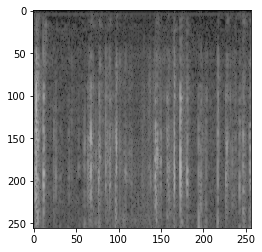

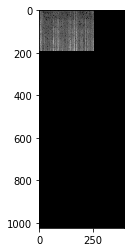

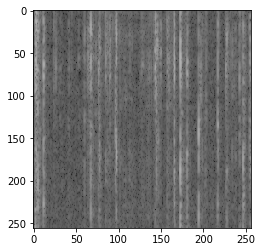

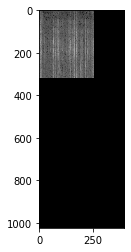

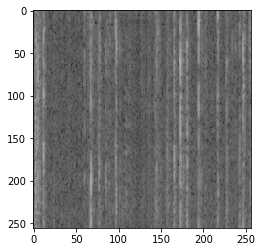

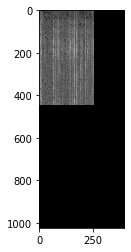

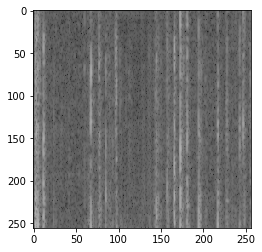

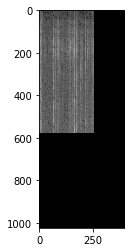

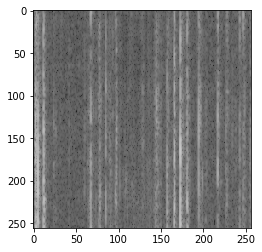

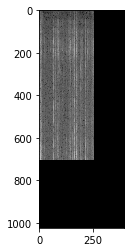

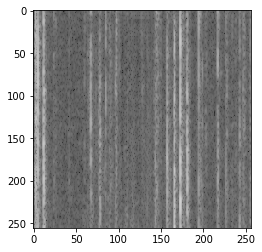

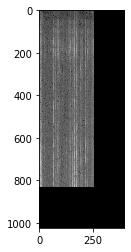

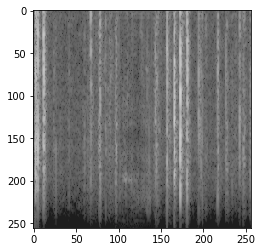

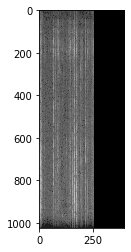

In [32]:
# Mix the split spec into one pieces with middle point blend.
img_blended = np.zeros((1024, 401, 3), dtype=np.int)
for i, filename in enumerate(sorted(Path(data_pth).glob('*a_output.png'))):
    print(i, filename)
    
    img = cv2.imread(str(filename))
    plt.figure()
    plt.imshow(img)
    
    if i is 0:
        img_blended[i*128:i*128+256-64, :256, :] = img[:256-64, :, :]
    elif i < 6:
        img_blended[i*128+64:i*128+256-64, :256, :] = img[64:256-64, :, :]
    else:
        img_blended[i*128+64:i*128+256, :256, :] = img[64:, : , :]
    plt.figure()
    plt.imshow(img_blended)

0 esc50/mag_origin_split/time_output/3-153444-A-32_0b_output.png
1 esc50/mag_origin_split/time_output/3-153444-A-32_1b_output.png
2 esc50/mag_origin_split/time_output/3-153444-A-32_2b_output.png
3 esc50/mag_origin_split/time_output/3-153444-A-32_3b_output.png
4 esc50/mag_origin_split/time_output/3-153444-A-32_4b_output.png
5 esc50/mag_origin_split/time_output/3-153444-A-32_5b_output.png
6 esc50/mag_origin_split/time_output/3-153444-A-32_6b_output.png


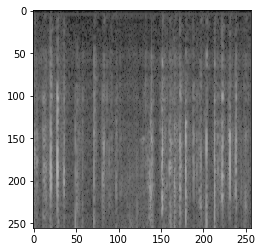

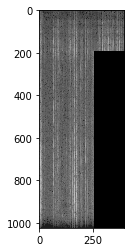

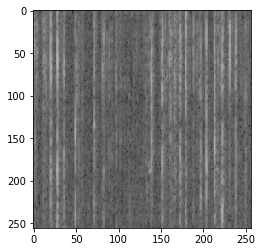

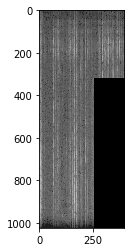

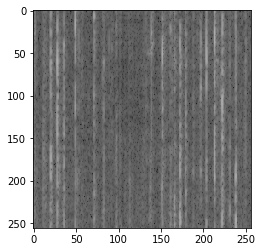

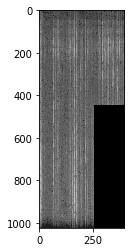

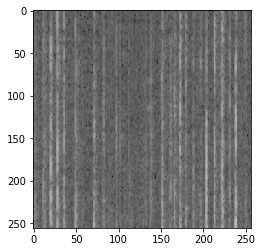

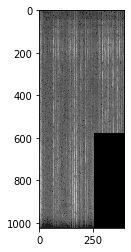

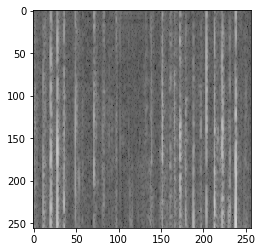

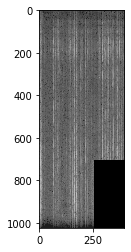

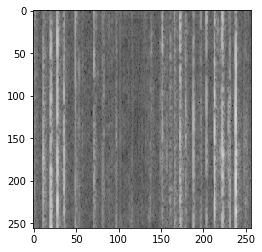

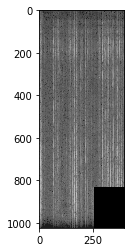

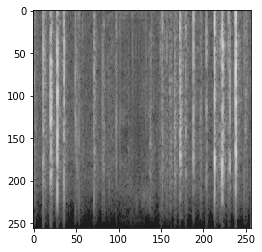

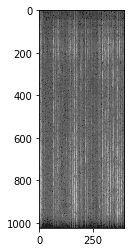

In [33]:
for i, filename in enumerate(sorted(Path(data_pth).glob('*b_output.png'))):
    print(i, filename)
    
    img = cv2.imread(str(filename))
    plt.figure()
    plt.imshow(img)
    
    if i is 0:
        img_blended[i*128:i*128+256-64, -256:, :] = img[:256-64, :, :]
    elif i < 6:
        img_blended[i*128+64:i*128+256-64, -256:, :] = img[64:256-64, :, :]
    else:
        img_blended[i*128+64:i*128+256, -256:, :] = img[64:, : , :]
    plt.figure()
    plt.imshow(img_blended)

In [35]:
cv2.imwrite(op.join(data_pth, '3-153444-A-32_blended.png'), img_blended)

True

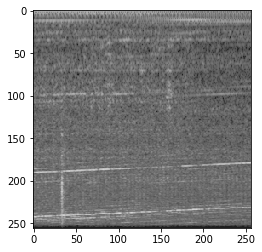

In [8]:
img = cv2.imread(str(filename))

plt.figure()
plt.imshow(img)

(1025, 401, 3)


True

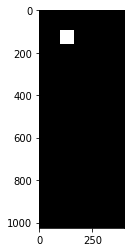

In [39]:
print(img.shape)
h, w, d = img.shape

square_mask = np.zeros((h, w, d), np.uint8)
square_mask = cv2.rectangle(square_mask, (96, 96), (160, 160), (255, 255, 255), -1)

plt.figure()
plt.imshow(square_mask)

cv2.imwrite('esc50/mask_square_origin.png', square_mask)
#print(square_mask)

(1025, 401, 3)


True

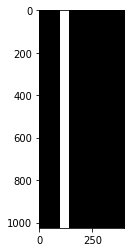

In [42]:
print(img.shape)
h, w, d = img.shape

time_mask = np.zeros((h, w, d), np.uint8)
time_mask = cv2.rectangle(time_mask, (100, 0), (140, h), (255, 255, 255), -1)

plt.figure()
plt.imshow(time_mask)

cv2.imwrite('esc50/mask_time_origin.png', time_mask)